# Background

***My work responsibilities cover using Google Analytics to monitor my company’s website daily traffic 
and I also use Meta Ads Manager to generate reports on advertising performance since my company 
launches the most campaign on Facebook and Instagram.*** 

***Most of our web traffic is through direct link through paid social advertisement. We often include a 
link in social post, that way users can be directed to our website. Since advertising/campaigns helped to 
import the most traffic to our website, my idea of this project is to analyze historical ads data and make 
recommendations on future advertising and marketing strategies, which include what audience groups we should promote ads to more often, and how we should allocate marketing budgets in the future.***

***This dataset is retrived from a web application called Meta Ads Manager within Meta Business Suite.  Because of my job functions, I am able to generate reports of historical campaign data on the ads displayed in different digital channels, ad costs, audiences and their responses.
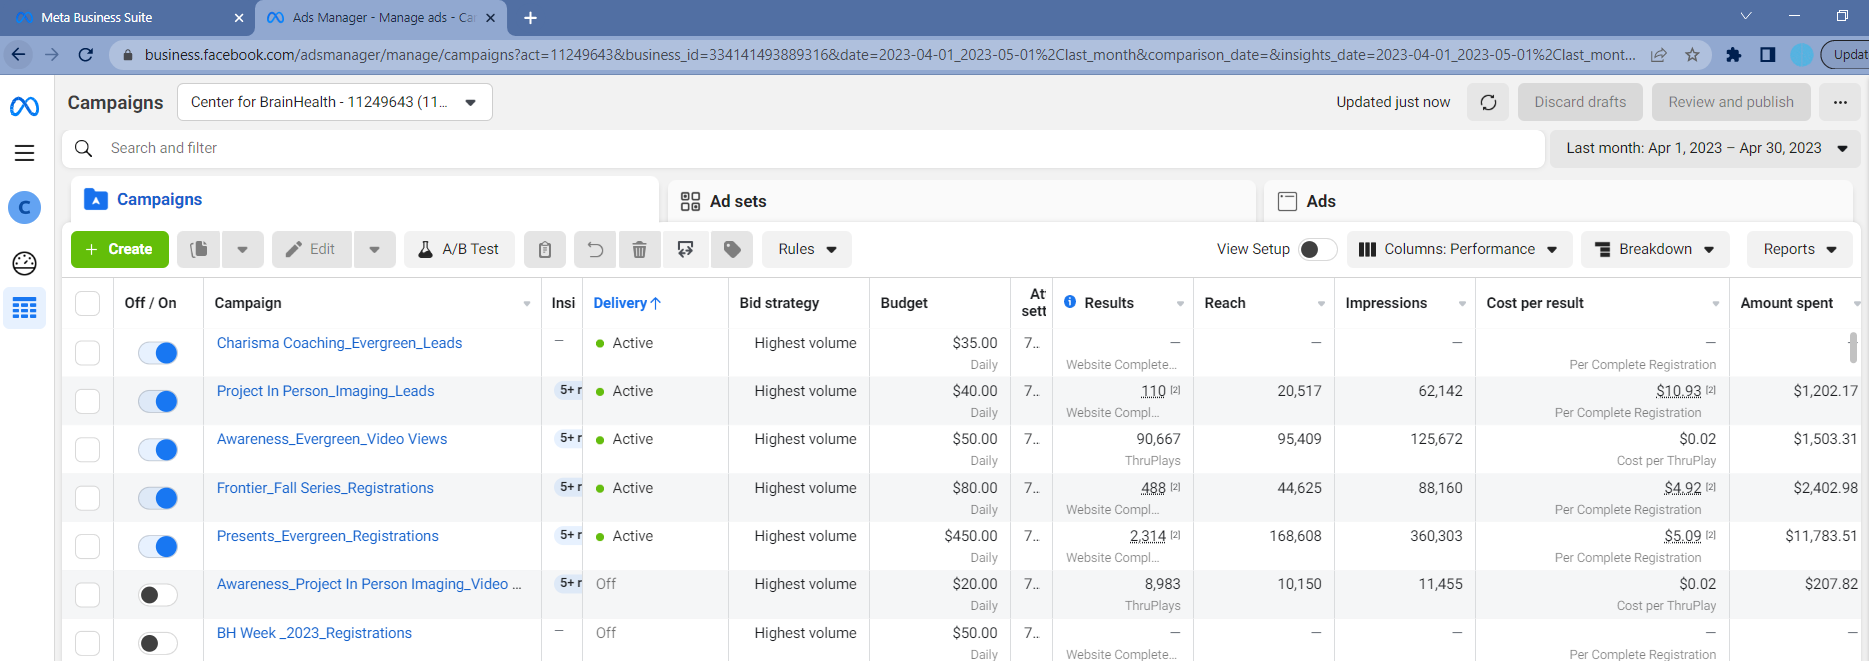***

***I generated the campaign data for the past 6 months (from November 2022 to April 2023), the goal of this project is to utilize these data to perform analysis in terms of marketing resources optimization on future campaigns.***

In [859]:
import pandas as pd

In [860]:
df = pd.read_csv('Dataset.csv') 

# Data Cleaning

In [861]:
import numpy as np

In [862]:
# Checking data shape
df.shape

(6253, 16)

In [863]:
# Viewing first few rows and columns
df.head()

,Day,Ad name,Campaign name,Campaign ID,Platform,Age,Gender,Impression device,Amount Spent,Clicks,CPC-cost per link click,"CPM-cost per 1,000 impressions",Video average play time,Impressions,Reach,Frequency
0,11/1/2022,NaN,Art of Kindness_Registration,6278035004397,facebook,18-24,female,android_smartphone,6.06,17.0,1.52,12.68,3.0,478.0,423.0,1.13
1,11/1/2022,NaN,Art of Kindness_Registration,6278035004397,instagram,55-64,male,android_smartphone,2.70,3.0,1.35,14.21,2.0,190.0,173.0,1.10
2,11/1/2022,NaN,Art of Kindness_Registration,6278035004397,facebook,35-44,unknown,android_tablet,0.02,0.0,NaN,5.00,3.0,4.0,4.0,1.00
3,11/1/2022,NaN,Art of Kindness_Registration,6278035004397,instagram,25-34,female,android_tablet,0.04,0.0,NaN,40.00,2.0,1.0,1.0,1.00
4,11/1/2022,NaN,Art of Kindness_Registration,6278035004397,facebook,55-64,unknown,desktop,0.86,2.0,0.86,7.68,2.0,112.0,107.0,1.05


In [864]:
# Checking columns details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6253 entries, 0 to 6252
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Day                             6253 non-null   object 
 1   Ad name                         5803 non-null   object 
 2   Campaign name                   6253 non-null   object 
 3   Campaign ID                     6253 non-null   int64  
 4   Platform                        6253 non-null   object 
 5   Age                             6253 non-null   object 
 6   Gender                          6253 non-null   object 
 7   Impression device               6253 non-null   object 
 8   Amount Spent                    6241 non-null   float64
 9   Clicks                          6037 non-null   float64
 10  CPC-cost per link click         5620 non-null   float64
 11  CPM-cost per 1,000 impressions  6148 non-null   float64
 12  Video average play time         60

In [865]:
# Cheking percentage missing values in each colums
percentage_missing = df.isnull().sum()*100/len(df)
percentage_missing

Day                                0.000000
Ad name                            7.196546
Campaign name                      0.000000
Campaign ID                        0.000000
Platform                           0.000000
Age                                0.000000
Gender                             0.000000
Impression device                  0.000000
Amount Spent                       0.191908
Clicks                             3.454342
CPC-cost per link click           10.123141
CPM-cost per 1,000 impressions     1.679194
Video average play time            2.830641
Impressions                        0.047977
Reach                              0.495762
Frequency                          0.399808
dtype: float64

***3.45% of the 'Clicks' have missing values, 7.19% of the 'Ad Name' have missing values, 10.12% of the 'CPC-cost per link click' have missing values, 1.68% of the 'CPM-cost per 1,000 impressions' have missing values, 2.83% of the 'Video average play time' have missing values. Columns of 'Impressions','Reach','Frequency' and 'Amount spent' have less than 1% missing values.***

In [866]:
# Dropping Ad Name column since it will not be very useful for analysis
df = df.drop(['Ad name'], axis=1)

In [867]:
df.shape

(6253, 15)

In [868]:
# Finding the mean of 'Clicks' column
mean_clicks = df['Clicks'].mean()

# Replacing NaNs in column 'Clicks' with the mean of values in the same column
df['Clicks'].fillna(value=mean_clicks, inplace=True)

In [869]:
# Finding the mean of 'Impressions' column
mean_Impressions = df['Impressions'].mean()

# Replacing NaNs in column 'Impressions' with the mean of values in the same column
df['Impressions'].fillna(value=mean_Impressions, inplace=True)

In [870]:
# Finding the mean of 'Reach' column
mean_Reach = df['Reach'].mean()

# Replacing NaNs in column 'Reach' with the mean of values in the same column
df['Reach'].fillna(value=mean_Reach, inplace=True)

In [871]:
# Finding the mean of 'Frequency' column
mean_Frequency = df['Frequency'].mean()

# Replacing NaNs in column 'Frequency' with the mean of values in the same column
df['Frequency'].fillna(value=mean_Frequency, inplace=True)

In [872]:
# Finding the mean of 'Amount Spent' column
mean_Amountspent = df['Amount Spent'].mean()

# Replacing NaNs in column 'Amount Spent' with the mean of values in the same column
df['Amount Spent'].fillna(value=mean_Amountspent, inplace=True)

In [873]:
# Finding the mean of 'CPC-cost per link click' column
mean_CPC = df['CPC-cost per link click'].mean()

# Replacing NaNs in column 'CPC-cost per link click' with the mean of values in the same column
df['CPC-cost per link click'].fillna(value=mean_CPC, inplace=True)

In [874]:
# Finding the mean of 'CPM-cost per 1,000 impressions' column
mean_CPM = df['CPM-cost per 1,000 impressions'].mean()

# Replacing NaNs in column 'CPM-cost per 1,000 impressions' with the mean of values in the same column
df['CPM-cost per 1,000 impressions'].fillna(value=mean_CPM, inplace=True)

In [875]:
# Finding the mean of 'Video average play time' column
mean_Aveplaytime = df['Video average play time'].mean()

# Replacing NaNs in column 'Video average play time' with the mean of values in the same column
df['Video average play time'].fillna(value=mean_Aveplaytime, inplace=True)

In [876]:
# Checking data with missing records again
percentage_missing = df.isnull().sum()*100/len(df)
percentage_missing

Day                               0.0
Campaign name                     0.0
Campaign ID                       0.0
Platform                          0.0
Age                               0.0
Gender                            0.0
Impression device                 0.0
Amount Spent                      0.0
Clicks                            0.0
CPC-cost per link click           0.0
CPM-cost per 1,000 impressions    0.0
Video average play time           0.0
Impressions                       0.0
Reach                             0.0
Frequency                         0.0
dtype: float64

***No missing records or null values after data cleaning process***

In [877]:
df.shape

(6253, 15)

In [878]:
df.head()

,Day,Campaign name,Campaign ID,Platform,Age,Gender,Impression device,Amount Spent,Clicks,CPC-cost per link click,"CPM-cost per 1,000 impressions",Video average play time,Impressions,Reach,Frequency
0,11/1/2022,Art of Kindness_Registration,6278035004397,facebook,18-24,female,android_smartphone,6.06,17.0,1.520000,12.68,3.0,478.0,423.0,1.13
1,11/1/2022,Art of Kindness_Registration,6278035004397,instagram,55-64,male,android_smartphone,2.70,3.0,1.350000,14.21,2.0,190.0,173.0,1.10
2,11/1/2022,Art of Kindness_Registration,6278035004397,facebook,35-44,unknown,android_tablet,0.02,0.0,1.036342,5.00,3.0,4.0,4.0,1.00
3,11/1/2022,Art of Kindness_Registration,6278035004397,instagram,25-34,female,android_tablet,0.04,0.0,1.036342,40.00,2.0,1.0,1.0,1.00
4,11/1/2022,Art of Kindness_Registration,6278035004397,facebook,55-64,unknown,desktop,0.86,2.0,0.860000,7.68,2.0,112.0,107.0,1.05


# Data Visualization

In [879]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [880]:
# Correlation matrix
df = df.loc[:, ~df.columns.isin(['Campaign name','Campaign ID'])]

<Axes: >

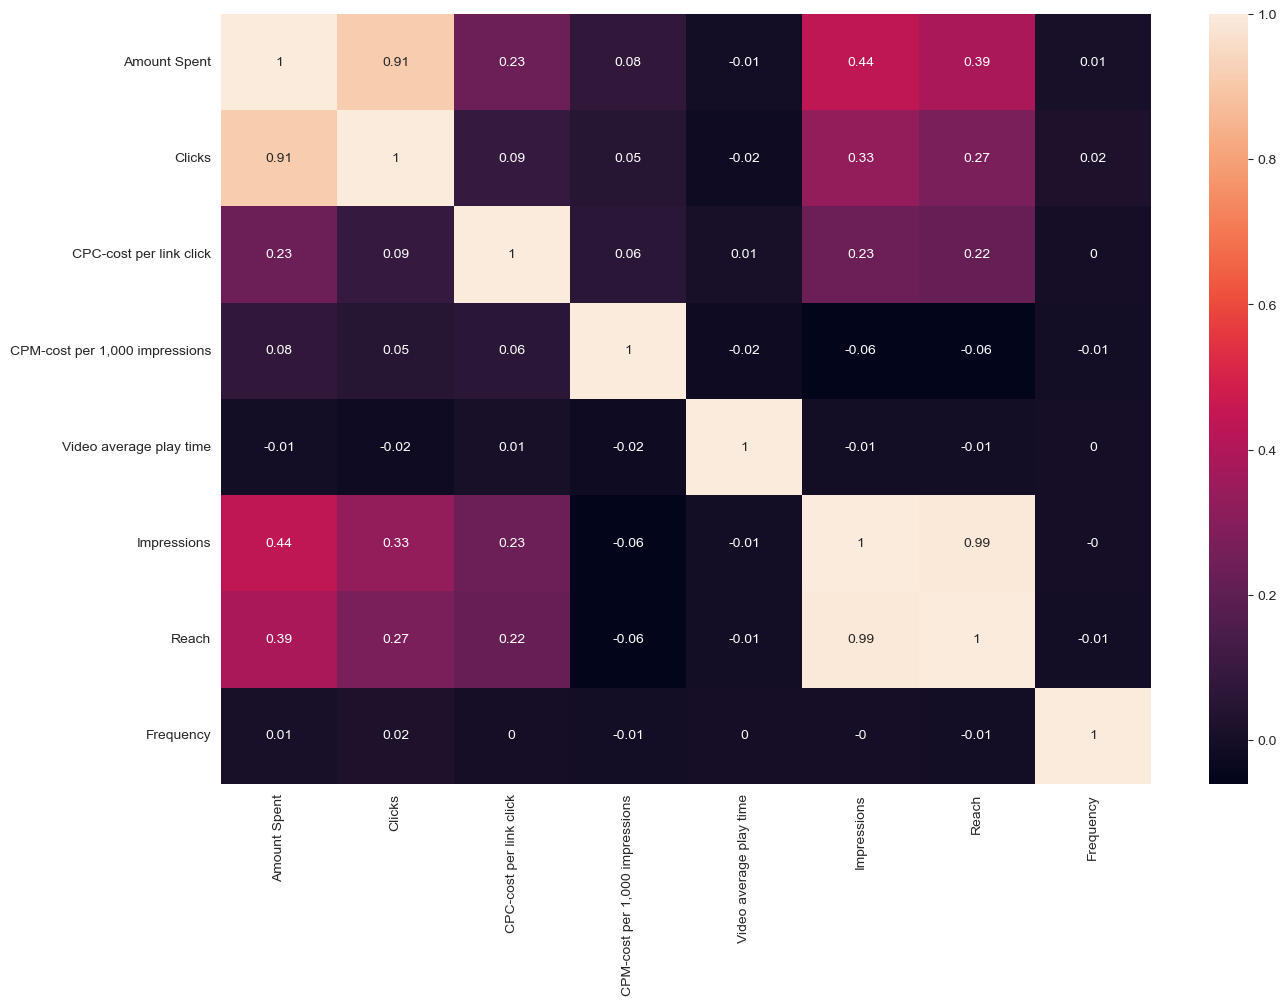

In [881]:
corr = df.corr().round(2)

# plot the heatmap
fig, ax = plt.subplots(figsize=(15,10))        
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, annot = True)

<Axes: xlabel='Amount Spent', ylabel='Impressions'>

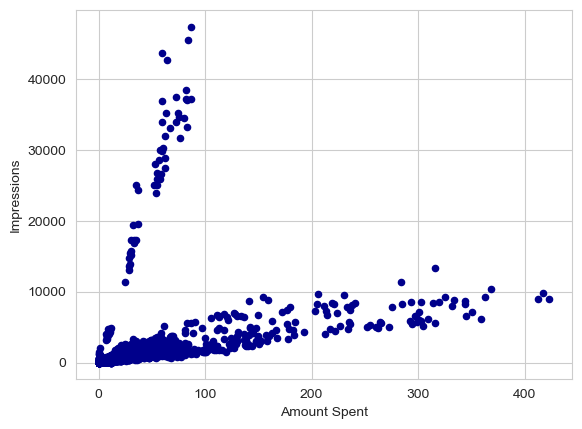

In [882]:
df.plot.scatter(x='Amount Spent', y='Impressions', c='DarkBlue')

<Axes: xlabel='Amount Spent', ylabel='Clicks'>

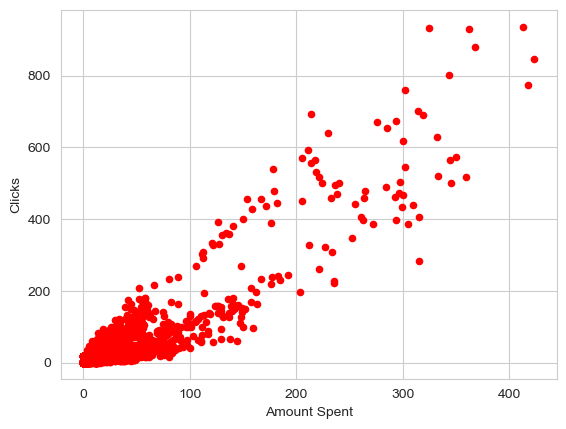

In [883]:
df.plot.scatter(x='Amount Spent', y='Clicks', c='red')

<Axes: xlabel='Amount Spent', ylabel='Reach'>

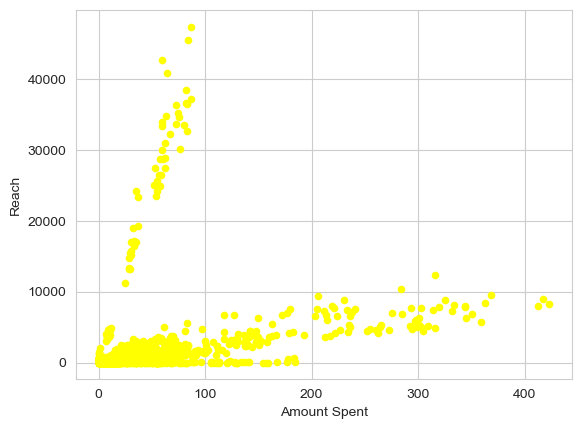

In [884]:
df.plot.scatter(x='Amount Spent', y='Reach', c='yellow')

<Axes: xlabel='Amount Spent', ylabel='Frequency'>

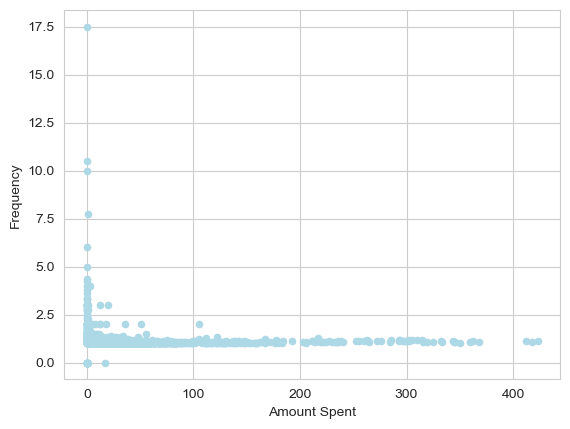

In [885]:
df.plot.scatter(x='Amount Spent', y='Frequency', c='lightblue')

<Axes: xlabel='Amount Spent', ylabel='Video average play time'>

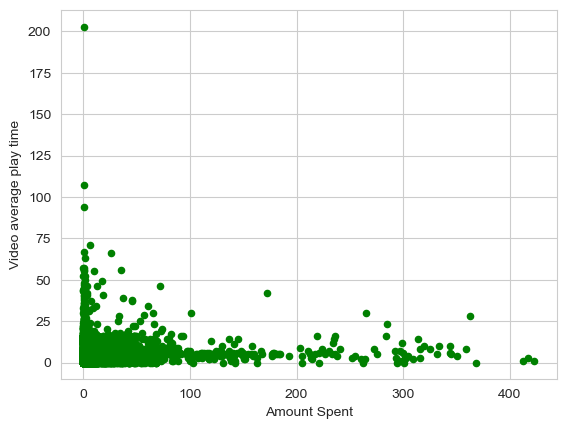

In [886]:
df.plot.scatter(x='Amount Spent', y='Video average play time', c='green')

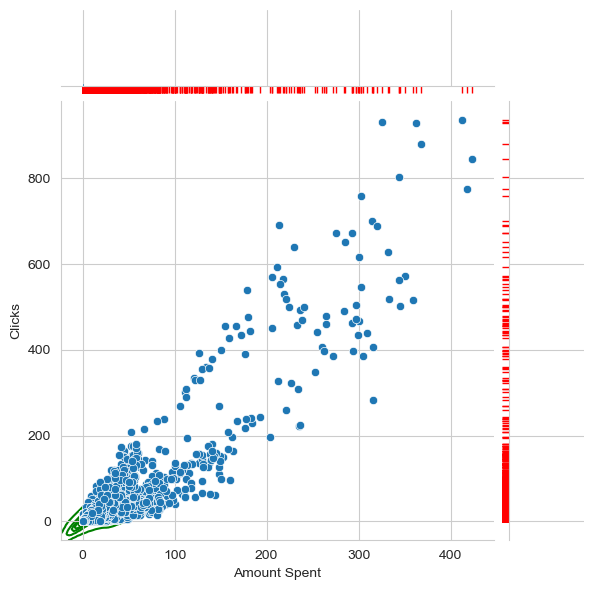

In [887]:
g = sns.jointplot(data=df, x='Amount Spent', y='Clicks')
g.plot_joint(sns.kdeplot, color='green', zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color='red', height=-0.1, clip_on=False)

<Axes: xlabel='Platform', ylabel='Count'>

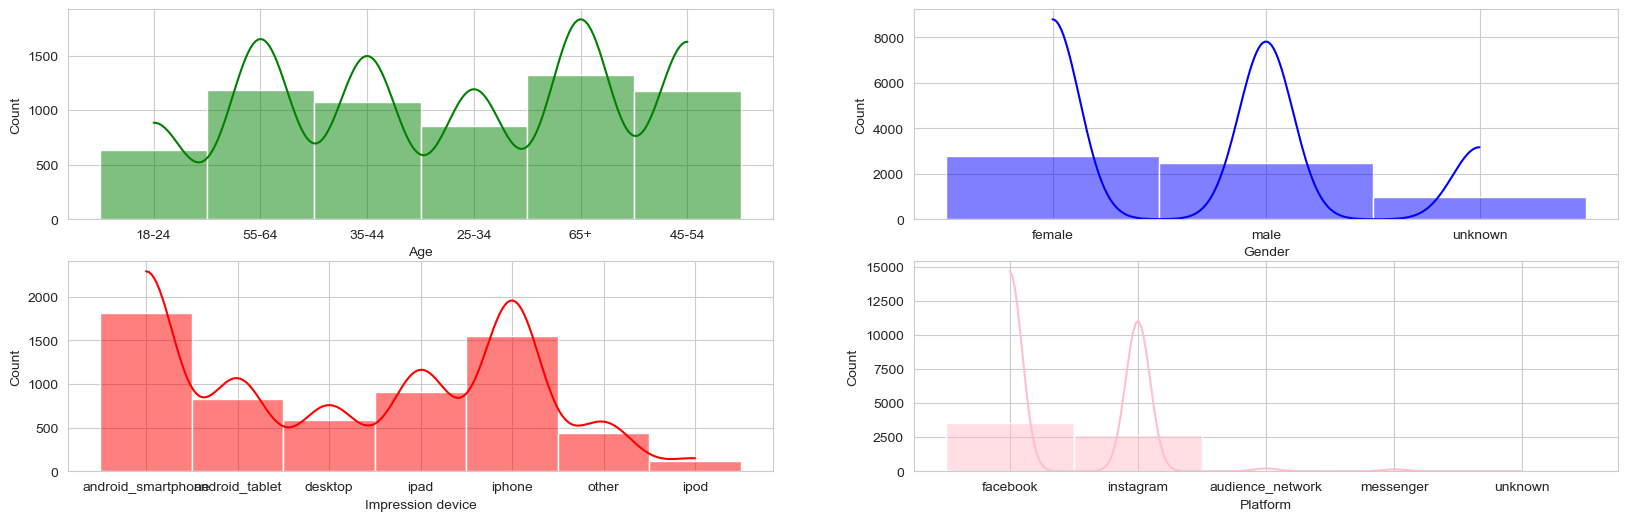

In [888]:
sns.set_style('whitegrid')
fig,axs=plt.subplots(2,2,figsize=(20,6))
sns.histplot(data=df,x='Age',kde=True,color='green',ax=axs[0,0])
sns.histplot(data=df,x='Gender',kde=True,color='blue',ax=axs[0,1])
sns.histplot(data=df,x='Impression device',kde=True,color='red',ax=axs[1,0])
sns.histplot(data=df,x='Platform',kde=True,color='pink',ax=axs[1,1])

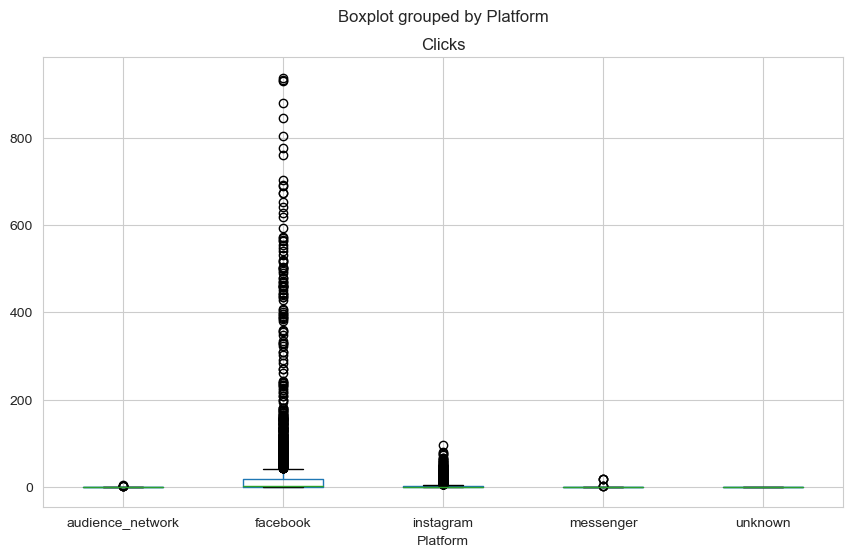

In [889]:
df.boxplot(column='Clicks', by='Platform', figsize=(10, 6))
plt.show()

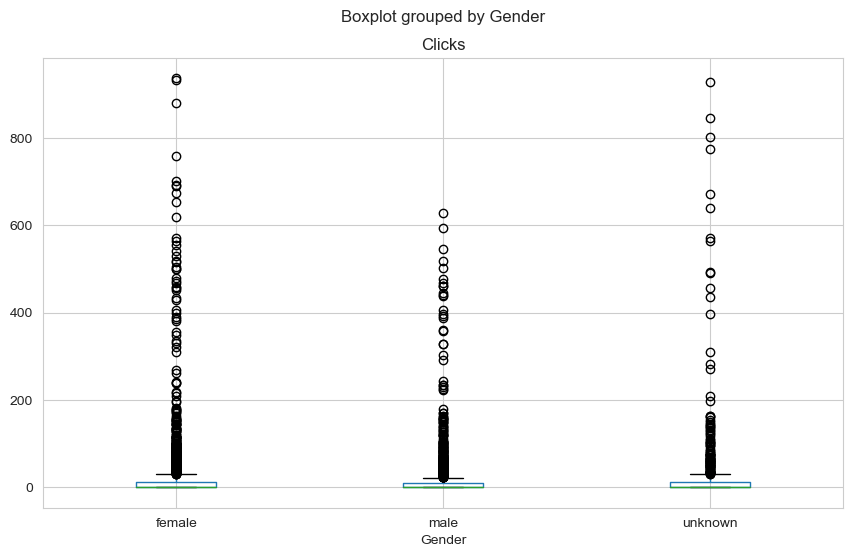

In [890]:
df.boxplot(column='Clicks', by='Gender', figsize=(10, 6))
plt.show()

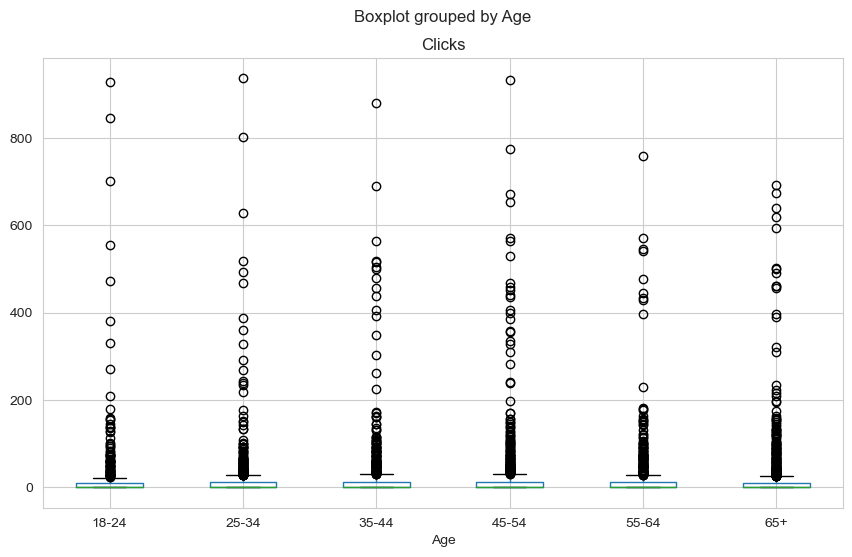

In [891]:
df.boxplot(column='Clicks', by='Age', figsize=(10, 6))
plt.show()

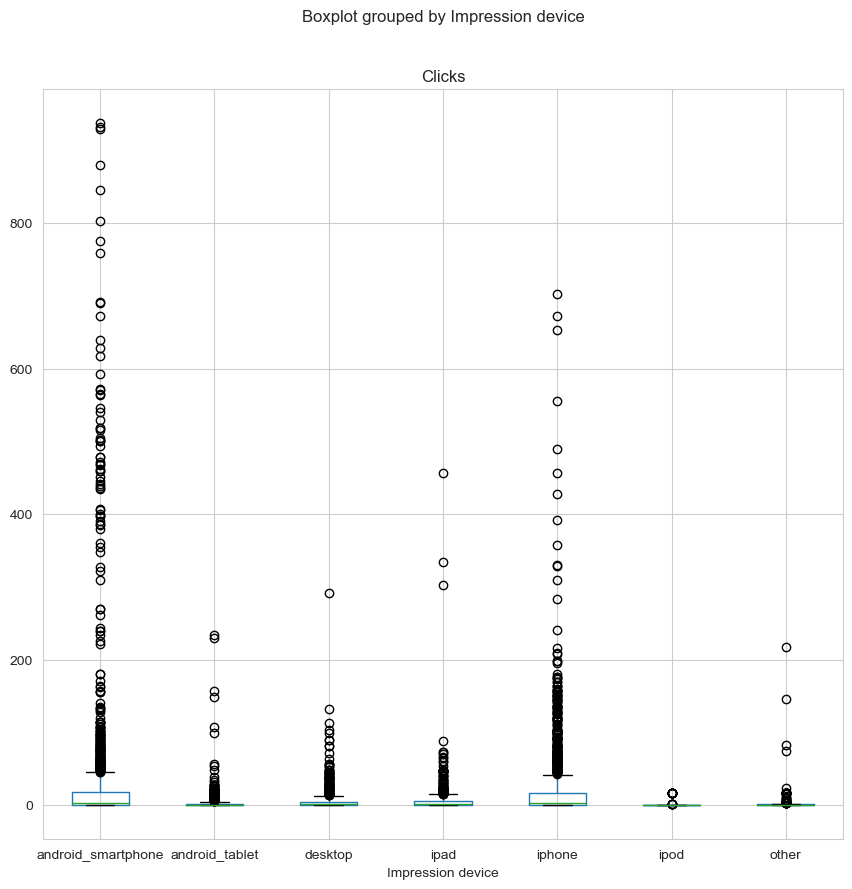

In [892]:
df.boxplot(column='Clicks', by='Impression device', figsize=(10, 10))
plt.show()

***To maximize the impact of future campaigns, it is essential to determine the most effective budget allocation for each audience group based on gender and age. Upon visualization of the dataset, it became clear that amount spent on ads/campaigns and ad metrics should be the basis of my model.***

# Models

In [893]:
# Trying out several regression models using different dependent and independent variables
y = df[['Clicks','CPC-cost per link click','CPM-cost per 1,000 impressions','Video average play time','Impressions','Reach','Frequency']]
X = df[['Amount Spent']]

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.18004633369318088
Test Score for Linear Regression: 0.17032066967585832


In [894]:
y = df[['Impressions']]
X = df[['Amount Spent']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.21091426299948257
Test Score for Linear Regression: 0.1658348970659801


In [895]:
y = df[['CPC-cost per link click']]
X = df[['Amount Spent']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.05139721333161962
Test Score for Linear Regression: 0.06139874993360628


In [896]:
y = df[['CPM-cost per 1,000 impressions']]
X = df[['Amount Spent']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.007223079385766273
Test Score for Linear Regression: 0.002595265268591329


In [897]:
y = df[['Video average play time']]
X = df[['Amount Spent']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 3.0850794333625586e-06
Test Score for Linear Regression: -0.00020888239122740515


In [898]:
y = df[['Clicks']]
X = df[['Amount Spent']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.826651437885281
Test Score for Linear Regression: 0.8381051819735899


***Based on the train score and test score provided above, the target variable I am interested in analyzing is 'Clicks', this variable is the number of clicks on our ads. Clicks to take actions identified as our campaign objective (such as liking 
our page for a page engagement campaign) and clicks to the link that is associated with our website page.***

In [899]:
df = df[df['Clicks']>0]

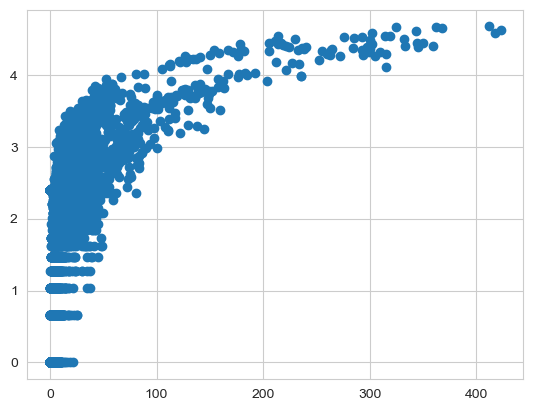

In [900]:
from scipy import stats
X = df[['Amount Spent']]
y = df['Clicks']
y,_ = stats.boxcox(y)
#X,_ = stats.boxcox(X)

y = pd.DataFrame({'Clicks':y})
#X = pd.DataFrame({'Amount Spent':X})

plt.scatter(X,y)

In [901]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
polreg = LinearRegression()
polreg.fit(X_train_poly, y_train)

print('Train Score for polynomial Regression:', polreg.score(X_train_poly, y_train))
print('Test Score for polynomial Regression:', polreg.score(X_test_poly, y_test))

Train Score for polynomial Regression: 0.48270587564774237
Test Score for polynomial Regression: 0.5104597662572081


In [902]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 0 to 6251
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Day                             3475 non-null   object 
 1   Platform                        3475 non-null   object 
 2   Age                             3475 non-null   object 
 3   Gender                          3475 non-null   object 
 4   Impression device               3475 non-null   object 
 5   Amount Spent                    3475 non-null   float64
 6   Clicks                          3475 non-null   float64
 7   CPC-cost per link click         3475 non-null   float64
 8   CPM-cost per 1,000 impressions  3475 non-null   float64
 9   Video average play time         3475 non-null   float64
 10  Impressions                     3475 non-null   float64
 11  Reach                           3475 non-null   float64
 12  Frequency                       34

In [903]:
df.drop(['Day','Platform','Impression device','CPC-cost per link click','CPM-cost per 1,000 impressions','Video average play time','Impressions','Reach','Frequency'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 0 to 6251
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3475 non-null   object 
 1   Gender        3475 non-null   object 
 2   Amount Spent  3475 non-null   float64
 3   Clicks        3475 non-null   float64
dtypes: float64(2), object(2)
memory usage: 135.7+ KB


In [904]:
df = df.dropna()

In [905]:
df_final = pd.get_dummies(df, columns = ['Age','Gender'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 0 to 6251
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amount Spent    3475 non-null   float64
 1   Clicks          3475 non-null   float64
 2   Age_18-24       3475 non-null   uint8  
 3   Age_25-34       3475 non-null   uint8  
 4   Age_35-44       3475 non-null   uint8  
 5   Age_45-54       3475 non-null   uint8  
 6   Age_55-64       3475 non-null   uint8  
 7   Age_65+         3475 non-null   uint8  
 8   Gender_female   3475 non-null   uint8  
 9   Gender_male     3475 non-null   uint8  
 10  Gender_unknown  3475 non-null   uint8  
dtypes: float64(2), uint8(9)
memory usage: 112.0 KB


In [907]:
df_final['Amount Spent'] = df_final['Amount Spent'].astype(int)

In [908]:
display(df_final.dtypes)

Amount Spent        int32
Clicks            float64
Age_18-24           uint8
Age_25-34           uint8
Age_35-44           uint8
Age_45-54           uint8
Age_55-64           uint8
Age_65+             uint8
Gender_female       uint8
Gender_male         uint8
Gender_unknown      uint8
dtype: object

In [909]:
y = df_final['Clicks']
X = df_final.drop('Clicks', axis=1)

In [910]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1991.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        23:37:15   Log-Likelihood:                -17246.
No. Observations:                3475   AIC:                         3.451e+04
Df Residuals:                    3466   BIC:                         3.456e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4927      0.485     -5.

In [911]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.8338901263128895
Test Score for Linear Regression: 0.7909788092212047


In [912]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
polreg = LinearRegression()
polreg.fit(X_train_poly, y_train)

print('Train Score for polynomial Regression:', polreg.score(X_train_poly, y_train))
print('Test Score for polynomial Regression:', polreg.score(X_test_poly, y_test))

Train Score for polynomial Regression: 0.8610256332918887
Test Score for polynomial Regression: 0.8361135420778901


In [913]:
# Ridge(random_state = 0)
from sklearn.linear_model import Ridge

ridge = Ridge(random_state= 0)
ridge.fit(X_train, y_train)

print('Train Score for Ridge Regression:', ridge.score(X_train, y_train))
print('Test Score for Ridge Regression:', ridge.score(X_test, y_test))

Train Score for Ridge Regression: 0.8338900037968743
Test Score for Ridge Regression: 0.7909757528790773


In [914]:
# Lasso(random_state = 0)
from sklearn.linear_model import Lasso

lasso = Lasso(random_state= 0)
lasso.fit(X_train, y_train)

print('Train Score for Lasso Regression:', lasso.score(X_train, y_train))
print('Test Score for Lasso Regression:', lasso.score(X_test, y_test))

Train Score for Lasso Regression: 0.8331484426598171
Test Score for Lasso Regression: 0.7910583648648504


In [915]:
# DecisionTreeRegressor(max_depth = 2, random_state= 0)
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(max_depth = 2, random_state= 0)
dr.fit(X_train, y_train)

print('Train Score for Decision Tree Regression:', dr.score(X_train, y_train))
print('Test Score for Decision Tree Regression:', dr.score(X_test, y_test))

Train Score for Decision Tree Regression: 0.8177830662252887
Test Score for Decision Tree Regression: 0.727808130360232


In [916]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

print('Train Score for KNN Regression:', knn.score(X_train, y_train))
print('Test Score for KNN Regression:', knn.score(X_test, y_test))

Train Score for KNN Regression: 0.8669421353963365
Test Score for KNN Regression: 0.7488524426136782


In [917]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)  
# Fitting the model
xgb_r.fit(X_train, y_train)

print('Train Score for XGBoost linear Regression:', xgb_r.score(X_train, y_train))
print('Test Score for XGBoost linear Regression:', xgb_r.score(X_test, y_test))

[23:37:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Train Score for XGBoost linear Regression: 0.9360346258732921
Test Score for XGBoost linear Regression: 0.7490309539123208


***Based on the model evaluation metrics, we can say Linear Regression is a great model for this dataset. The R-Squared scored 82% in ANOVA analysis as showing in this screenshot 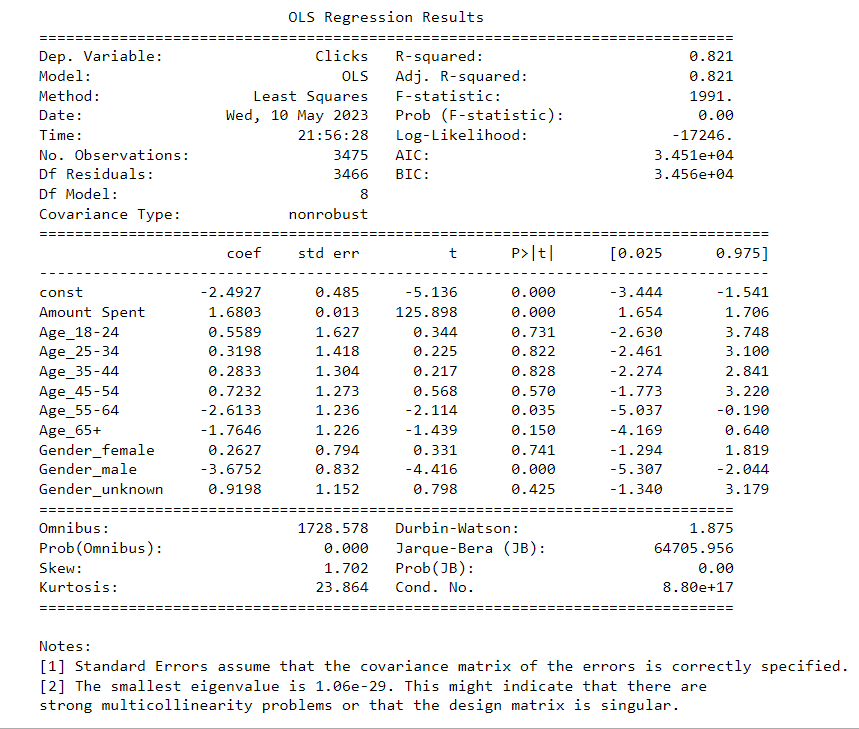***

***With these coefficients populated above, our marketing team should avoid investing in audience group of male and age groups above 65+. Every extra dollar spend on advertising will increase clicks by 1.68%. Advertising and lauch campaigns towards female audience and age groups between 18-54 could bring more web traffic in the future.*** 

